In [36]:
## Import Libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
# conda install -c conda-forge mlxtend

In [37]:
## Import dataset
books= pd.read_csv('/content/book.csv')

In [38]:
books

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [39]:
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [40]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm

# Associations Rule with 0.10% support and 0.70% confidence interval

In [56]:
## with 0.10% support
frequent_itemsets = apriori(books,min_support=0.1,use_colnames= True)
frequent_itemsets['lenght']= frequent_itemsets['itemsets'].apply(lambda x:len(x))

In [57]:
frequent_itemsets

,support,itemsets,lenght
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [43]:
## with 0.70% threshold or confidence
rules = association_rules(frequent_itemsets,metric = 'lift',min_threshold=0.7)

In [44]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [59]:
rules['antecedents_len']= rules['antecedents'].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,antecedents_len
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,1,1
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,1,1
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,1,1
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,1,1
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2,2
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2,2
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,1,1
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327,1,1


# lenght = 1 with support >=0.10

In [60]:
##let's assume we are only interested in itemsets of length 1 that have a support >=0.10.
frequent_itemsets[(frequent_itemsets['lenght']==1 )& (frequent_itemsets['support']>=0.10)]

,support,itemsets,lenght
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1


#antecedent lenght =1

In [67]:
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,antecedents_len
7,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548,1,1
11,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074,1,1
23,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556,1,1
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf,1,1


In [73]:
rules[(rules['antecedents_len']==1) & (rules['confidence'] > 0.80) & (rules['lift']>1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,antecedents_len
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,1,1


# lenght = 2 with support >=0.10

In [76]:
##let's assume we are only interested in itemsets of length 2 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.1)].shape

(20, 3)

In [74]:
frequent_itemsets[(frequent_itemsets['lenght']==2 )& (frequent_itemsets['support']>=0.10)]

,support,itemsets,lenght
9,0.1650,"(ChildBks, YouthBks)",2
10,0.2560,"(ChildBks, CookBks)",2
11,0.1840,"(ChildBks, DoItYBks)",2
12,0.1515,"(ChildBks, RefBks)",2
13,0.1625,"(ChildBks, ArtBks)",2
14,0.1950,"(ChildBks, GeogBks)",2
15,0.1620,"(CookBks, YouthBks)",2
16,0.1155,"(DoItYBks, YouthBks)",2
17,0.1010,"(ArtBks, YouthBks)",2
18,0.1205,"(GeogBks, YouthBks)",2


# antecedent lenght =2

In [75]:
rules[(rules['antecedents_len']==2) & (rules['confidence'] > 0.7) & (rules['lift']>1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,antecedents_len
41,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917,2,2
42,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545,2,2
46,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158,2,2
48,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928,2,2
53,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,2,2
54,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,2,2
58,"(ChildBks, ArtBks)",(CookBks),0.1625,0.431,0.1265,0.778462,1.806175,0.056462,2.568403,2,2
60,"(ArtBks, CookBks)",(ChildBks),0.1670,0.423,0.1265,0.757485,1.790745,0.055859,2.379235,2,2
64,"(ChildBks, GeogBks)",(CookBks),0.1950,0.431,0.1495,0.766667,1.778809,0.065455,2.438571,2,2
66,"(GeogBks, CookBks)",(ChildBks),0.1925,0.423,0.1495,0.776623,1.835989,0.068072,2.583081,2,2


In [78]:
rules[(rules['antecedents_len']==2) & (rules['confidence'] > 0.8) & (rules['lift']>1.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,antecedents_len
53,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534,2,2
54,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083,2,2
82,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159,2,2
88,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354,2,2
94,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812,2,2


#lenght = 3 with support >=0.10

In [79]:
##let's assume we are only interested in itemsets of length 3 that have a support >= 10 .
frequent_itemsets[(frequent_itemsets['lenght']==3 )& (frequent_itemsets['support']>=0.1)].shape

(10, 3)

In [81]:

frequent_itemsets[(frequent_itemsets['lenght']==3 )& (frequent_itemsets['support']>=0.1)]

,support,itemsets,lenght
29,0.1290,"(ChildBks, CookBks, YouthBks)",3
30,0.1460,"(ChildBks, DoItYBks, CookBks)",3
31,0.1225,"(ChildBks, CookBks, RefBks)",3
32,0.1265,"(ChildBks, ArtBks, CookBks)",3
33,0.1495,"(ChildBks, GeogBks, CookBks)",3
34,0.1045,"(ChildBks, DoItYBks, GeogBks)",3
35,0.1020,"(ChildBks, ArtBks, GeogBks)",3
36,0.1015,"(ArtBks, DoItYBks, CookBks)",3
37,0.1085,"(GeogBks, DoItYBks, CookBks)",3
38,0.1035,"(GeogBks, ArtBks, CookBks)",3


In [90]:
rules[['antecedent_len']]==3
##As per this comparission no antecedent len is equal to 3. Therefore no rules can be formed after this

,antecedent_len
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


# A leverage value of 0 indicates independence. Range will be [-1 1]
## A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

# Forming rules for entire dataset

In [94]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(ArtBks, CookBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [106]:
# Here we are checking Lift Ratio > 1  and is a good influential rule in selecting the associated transactions
Df= rules[(rules['lift']>=2) & (rules['support']>=0.1) & (rules['confidence']>0.6)]
Df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
83,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063


In [108]:
Df.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
29,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628
96,"(ArtBks, CookBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063
83,"(ArtBks, CookBks)",(DoItYBks),0.1670,0.282,0.1015,0.607784,2.155264,0.054406,1.830626


In [109]:
##Visualisation of above data analysis of books association rules 
import matplotlib.pyplot as plt
%matplotlib inline

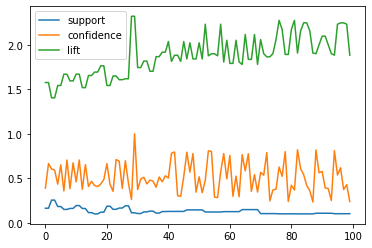

In [110]:
rules[['support', 'confidence','lift' ]].plot()

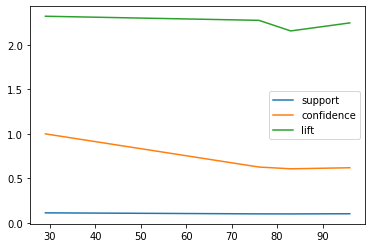

In [112]:
Df[['support', 'confidence','lift' ]].plot()

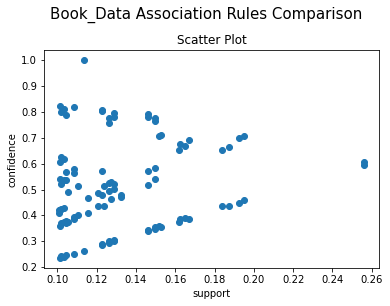

In [ ]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Scatter Plot')
plt.suptitle('Book_Data Association Rules Comparison', size=15, y=1.03)

plt.show()

(array([12., 16., 16., 17., 11.,  8.,  6., 13.,  0.,  1.]),
 array([0.23549884, 0.31194896, 0.38839907, 0.46484919, 0.5412993 ,
        0.61774942, 0.69419954, 0.77064965, 0.84709977, 0.92354988,
        1.        ]),
 <BarContainer object of 10 artists>)

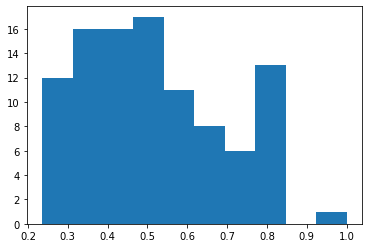

In [ ]:
plt.hist(rules['confidence'])

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.60778443, 0.64700599, 0.68622754, 0.7254491 , 0.76467066,
        0.80389222, 0.84311377, 0.88233533, 0.92155689, 0.96077844,
        1.        ]),
 <a list of 10 Patch objects>)

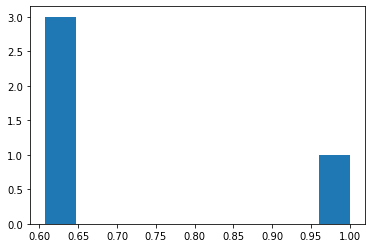

In [113]:
plt.hist(Df['confidence'])

(array([ 6.,  6.,  3., 13.,  8.,  8.,  7., 10.,  7.,  4.,  4.,  4.,  4.,
         2., 10.,  3.,  0.,  0.,  0.,  1.]),
 array([0.23549884, 0.2737239 , 0.31194896, 0.35017401, 0.38839907,
        0.42662413, 0.46484919, 0.50307425, 0.5412993 , 0.57952436,
        0.61774942, 0.65597448, 0.69419954, 0.73242459, 0.77064965,
        0.80887471, 0.84709977, 0.88532483, 0.92354988, 0.96177494,
        1.        ]),
 <BarContainer object of 20 artists>)

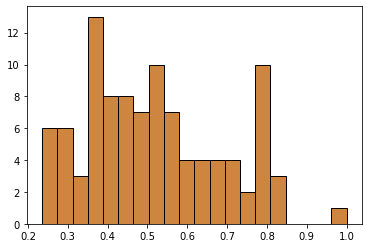

In [ ]:
plt.hist(rules['confidence'],bins=20,facecolor ="peru",edgecolor ="black")

(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([0.60778443, 0.62739521, 0.64700599, 0.66661677, 0.68622754,
        0.70583832, 0.7254491 , 0.74505988, 0.76467066, 0.78428144,
        0.80389222, 0.82350299, 0.84311377, 0.86272455, 0.88233533,
        0.90194611, 0.92155689, 0.94116766, 0.96077844, 0.98038922,
        1.        ]),
 <a list of 20 Patch objects>)

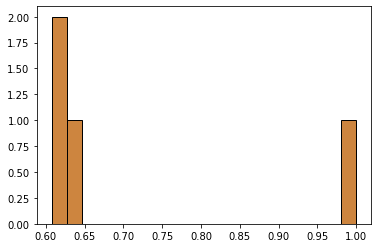

In [114]:
plt.hist(Df['confidence'],bins=20,facecolor ="peru",edgecolor ="black")

(array([40., 24.,  8., 14.,  4.,  6.,  2.,  0.,  0.,  2.]),
 array([0.101 , 0.1165, 0.132 , 0.1475, 0.163 , 0.1785, 0.194 , 0.2095,
        0.225 , 0.2405, 0.256 ]),
 <BarContainer object of 10 artists>)

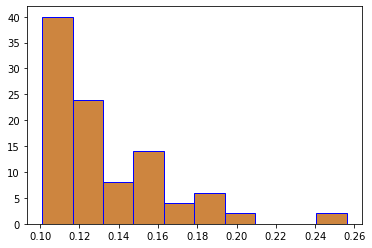

In [ ]:
plt.hist(rules['support'],facecolor ="peru",edgecolor ="blue")

(array([2., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.1015, 0.1027, 0.1039, 0.1051, 0.1063, 0.1075, 0.1087, 0.1099,
        0.1111, 0.1123, 0.1135]),
 <a list of 10 Patch objects>)

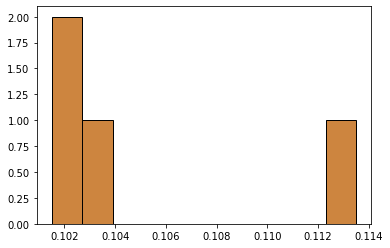

In [115]:
plt.hist(Df['support'],facecolor ="peru",edgecolor ="black")

{'whiskers': [<matplotlib.lines.Line2D at 0x2464403d070>,
 'caps': [<matplotlib.lines.Line2D at 0x24645c98eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24643fd11c0>],
 'medians': [<matplotlib.lines.Line2D at 0x24648f38490>],
 'fliers': [<matplotlib.lines.Line2D at 0x24648f38880>],
 'means': []}

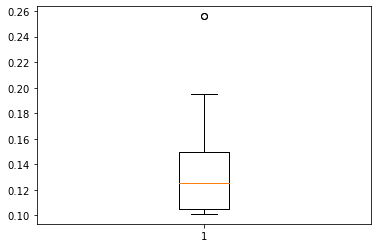

In [ ]:
plt.boxplot(rules['support'],vert = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f07df806c10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f07df91fd50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07e008c850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f07e00337d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f07df89bed0>,
  <matplotlib.lines.Line2D at 0x7f07df897590>]}

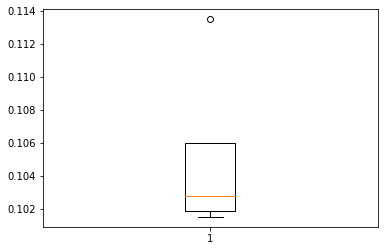

In [118]:
plt.boxplot(Df['support'],vert = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f07df6d4950>],
 'caps': [<matplotlib.lines.Line2D at 0x7f07df6d8990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07df6dd9d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f07df6dd490>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f07df6d4ed0>,
  <matplotlib.lines.Line2D at 0x7f07df6d8450>]}

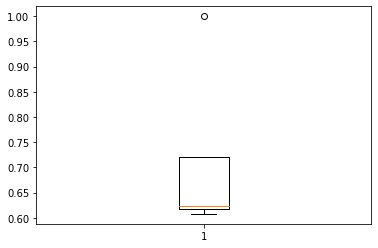

In [119]:
plt.boxplot(Df['confidence'],vert = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7f07df6408d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f07df644910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f07df64b950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f07df64b410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f07df640e50>,
  <matplotlib.lines.Line2D at 0x7f07df6443d0>]}

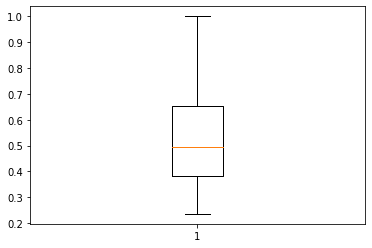

In [120]:
plt.boxplot(rules['confidence'],vert= True)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2464910a9d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2464910a820>,
 'cmins': <matplotlib.collections.LineCollection at 0x2464910a850>,
 'cbars': <matplotlib.collections.LineCollection at 0x246491171c0>}

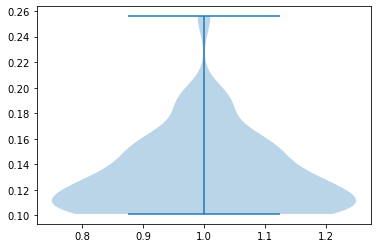

In [ ]:
## Violinplot used for checkin how dense the data is
plt.violinplot(rules['support'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07df5a4e90>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f07df5a4c10>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07df604b90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07df5b0090>}

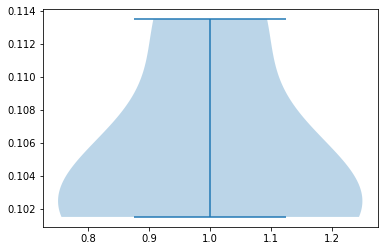

In [121]:
plt.violinplot(Df['support'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x246491704c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x24649170310>,
 'cmins': <matplotlib.collections.LineCollection at 0x24649170370>,
 'cbars': <matplotlib.collections.LineCollection at 0x24649170970>}

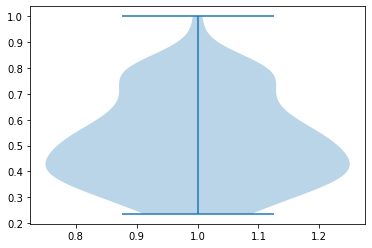

In [ ]:
plt.violinplot(rules['confidence'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07df59d210>],
 'cbars': <matplotlib.collections.LineCollection at 0x7f07df59d790>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07df58a510>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07df59d310>}

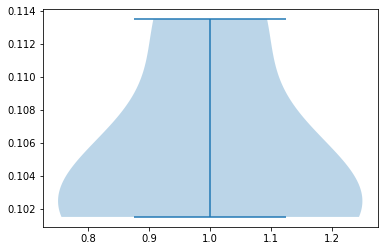

In [122]:
plt.violinplot(Df['support'])

In [123]:
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='support'>

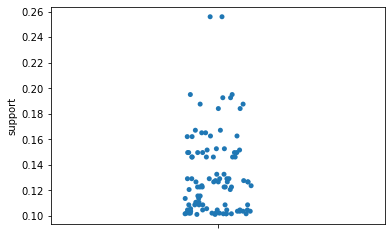

In [ ]:
sns.stripplot(y= 'support', data=rules,jitter=True)

<AxesSubplot:ylabel='confidence'>

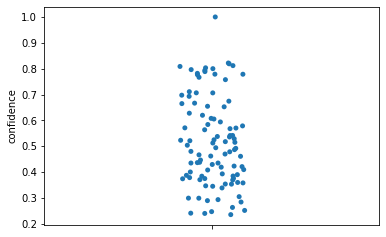

In [ ]:
sns.stripplot(y= 'confidence', data=rules,jitter=True)

# Associations Rule with 0.2% support and 0.80% confidence interval

In [ ]:
## with 0.2% support
frequent_itemsets2 = apriori(books,min_support=0.2,use_colnames= True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [ ]:
## with 0.8% threshold or confidence
rules2 = association_rules(frequent_itemsets2,metric = 'lift',min_threshold=0.8)

In [ ]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [ ]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


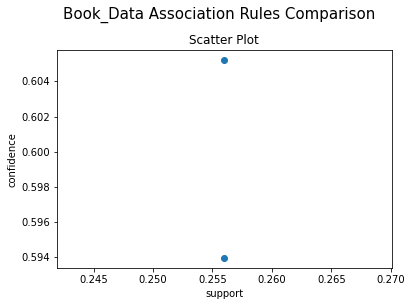

In [ ]:
####Visualisation of above data analysis books association rules2
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Scatter Plot')
plt.suptitle('Book_Data Association Rules Comparison', size=15, y=1.03)

plt.show()

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.59396752, 0.59509086, 0.5962142 , 0.59733755, 0.59846089,
        0.59958423, 0.60070757, 0.60183092, 0.60295426, 0.6040776 ,
        0.60520095]),
 <BarContainer object of 10 artists>)

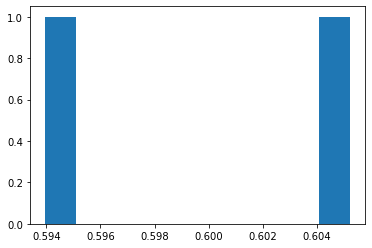

In [ ]:
plt.hist(rules2['confidence'])

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([-0.244, -0.144, -0.044,  0.056,  0.156,  0.256,  0.356,  0.456,
         0.556,  0.656,  0.756]),
 <BarContainer object of 10 artists>)

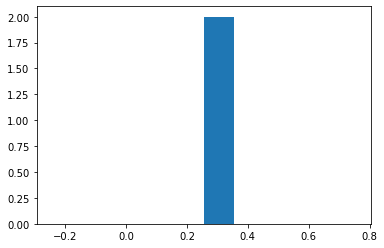

In [ ]:
plt.hist(rules2['support'])

<AxesSubplot:ylabel='support'>

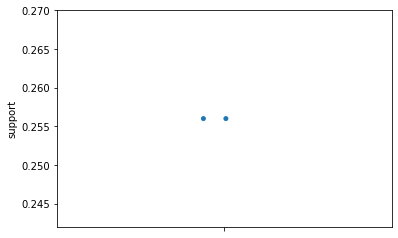

In [ ]:
sns.stripplot(y= 'support', data=rules2,jitter=True)

<AxesSubplot:ylabel='confidence'>

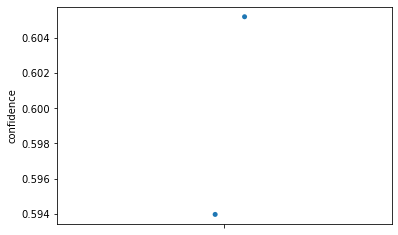

In [ ]:
sns.stripplot(y= 'confidence', data=rules2,jitter=True)

#  Associations Rule with 8% support and 80% confidence interval

In [ ]:
## with 0.2% support
frequent_itemsets3 = apriori(books,min_support=0.08,use_colnames= True)

In [ ]:
frequent_itemsets3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [ ]:
## with 0.6% threshold or confidence
rules3 = association_rules(frequent_itemsets3,metric = 'lift',min_threshold=0.8)

In [ ]:
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
249,"(GeogBks, ChildBks)","(ArtBks, CookBks)",0.1950,0.1670,0.0835,0.428205,2.564103,0.050935,1.456816
250,(ArtBks),"(GeogBks, CookBks, ChildBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400
251,(CookBks),"(ArtBks, ChildBks, GeogBks)",0.4310,0.1020,0.0835,0.193735,1.899368,0.039538,1.113778
252,(ChildBks),"(ArtBks, CookBks, GeogBks)",0.4230,0.1035,0.0835,0.197400,1.907242,0.039720,1.116994


In [ ]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
249,"(GeogBks, ChildBks)","(ArtBks, CookBks)",0.1950,0.1670,0.0835,0.428205,2.564103,0.050935,1.456816
250,(ArtBks),"(GeogBks, CookBks, ChildBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400
251,(CookBks),"(ArtBks, ChildBks, GeogBks)",0.4310,0.1020,0.0835,0.193735,1.899368,0.039538,1.113778
252,(ChildBks),"(ArtBks, CookBks, GeogBks)",0.4230,0.1035,0.0835,0.197400,1.907242,0.039720,1.116994
